In [33]:
from	sklearn.datasets	import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.datasets as datasets
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np


import pandas as pd
from scipy.stats import norm
from itertools import product
from keras.models import *
from keras.layers import Activation, Dense
from keras import *
import matplotlib.pyplot as plt




from numpy import savetxt

breast_cancer = load_breast_cancer()

X=pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
Y=breast_cancer.target


In [34]:
# Split dataset into training and test sets
'''Para decidir los tamaños de los datos de test y los datos de training:
      - El tamaño de training data debe ser bastante grande para que al entrenar el modelo obtengamos las predicciones más exactas posibles
      - Para el modelo knn: Dimensionalidad de los datos: 30  -> curse of dimensionality: cuantas más dimensiones hay, más dificil es encontrar vecinos cerca. 
        Para que pueda haber una mayor cantidad de vecinos, se debe aumentar aún más el tamaño del training data.
   
   Por lo tanto:          training -> 80 % de los datos                  testing  -> 20 % de los datos'''

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state=0)


MODELOS PARA LA PREGUNTA 8

In [54]:
#leer los datos del archivo diabetes.csv
datos= pd.read_csv ('diabetes.csv')
X = datos.iloc[:,:-1]
Y = datos.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [42]:
#KNN

#chose the number of neighbors
k = 3   # k = sqrt(n)
model_knn =KNeighborsClassifier(k)

#Fit the classifier on the Training Set
model_knn.fit(X_train,Y_train)

#Evaluate the Model

#Make the predictions on the Test set
Y_pred_train = model_knn.predict(X_train)
Y_pred_test = model_knn.predict(X_test)

print("Percentage of correct predictions (training): %.3f" %(100*accuracy_score(Y_train,Y_pred_train)), "%")
print("Percentage of correct predictions (test)    : %.3f" %(100*accuracy_score(Y_test,Y_pred_test)), "%")
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred_test))

Percentage of correct predictions (training): 85.179 %
Percentage of correct predictions (test)    : 72.078 %
MSE: 0.28


In [43]:
#Arboles

#fit model
model_tree =  DecisionTreeClassifier(max_depth = 10, random_state=0)
model_tree.fit(X_train, Y_train)

#Fit the classifier on the Training Set
Y_pred_train= model_tree.predict(X_train)

#Make the predictions on the Test set
Y_pred_test= model_tree.predict(X_test)

print("Percentage of correct predictions (training): %.3f" %(100*accuracy_score(Y_train,Y_pred_train)), "%")
print("Percentage of correct predictions (test)    : %.3f" %(100*accuracy_score(Y_test,Y_pred_test)), "%")


print('MSE: %.2f'% mean_squared_error(Y_test, Y_pred_test))

Percentage of correct predictions (training): 97.231 %
Percentage of correct predictions (test)    : 81.169 %
MSE: 0.19


In [44]:
#Naive Bayes

#fit model
model_nb=GaussianNB(priors = [0.5, 0.5])
model_nb.fit(X_train, Y_train)

#prediction
Y_pred_train=model_nb.predict(X_train)
Y_pred_test=model_nb.predict(X_test)

print("Percentage of correct predictions (training): %.3f" %(100*accuracy_score(Y_train,Y_pred_train)), "%")
print("Percentage of correct predictions (test)    : %.3f" %(100*accuracy_score(Y_test,Y_pred_test)), "%")

print('MSE: %.2f'% mean_squared_error(Y_test, Y_pred_test))

Percentage of correct predictions (training): 74.919 %
Percentage of correct predictions (test)    : 76.623 %
MSE: 0.23


RED NEURONAL

In [49]:
#Red neuronal
#por ahora no ejecutar esto 
#tamano_total = len(X)

#Cantidad_primer_grupo = round(tamano_total*0.65)

#X_train = X.iloc[:Cantidad_primer_grupo,:]
#Y_train = Y.iloc[:Cantidad_primer_grupo]

#Cantidad_segundo_grupo= round(tamano_total*0.25)

#X_test = X.iloc[Cantidad_primer_grupo:Cantidad_segundo_grupo,:]
#Y_test = Y.iloc[Cantidad_primer_grupo:Cantidad_segundo_grupo]


#X_vali = X.iloc[Cantidad_segundo_grupo:,:]
#Y_vali = Y.iloc[Cantidad_segundo_grupo:]

Epoch 1/100
16/16 [==============================] - 2s 53ms/step - loss: 13.5746 - Accuracy: 0.6273 - precision: 0.4878 - recall: 0.1099 - val_loss: 10.3972 - val_Accuracy: 0.6504 - val_precision: 0.4000 - val_recall: 0.2051
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 10.2584 - Accuracy: 0.6191 - precision: 0.4706 - recall: 0.2198 - val_loss: 8.3343 - val_Accuracy: 0.6260 - val_precision: 0.3793 - val_recall: 0.2821
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 7.7065 - Accuracy: 0.6008 - precision: 0.4417 - recall: 0.2912 - val_loss: 6.2107 - val_Accuracy: 0.5935 - val_precision: 0.3333 - val_recall: 0.2821
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 5.2665 - Accuracy: 0.6008 - precision: 0.4462 - recall: 0.3187 - val_loss: 4.0681 - val_Accuracy: 0.6016 - val_precision: 0.3333 - val_recall: 0.2564
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 3.2996 - Accuracy: 0.5886 - pre

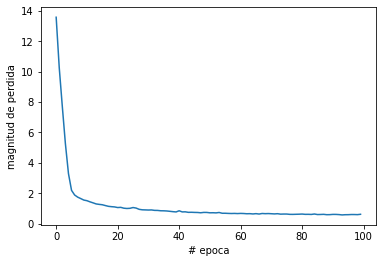

In [58]:
model = Sequential(name = 'RedesNeuronalesAlimentadasHaciaDelante')
model.add(Input(shape=(8,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(16, activation='softplus', name='Hidden-Layer1')) # Numero nueronas en la capa 1, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy', 'Precision', 'Recall']) 

history = model.fit(X_train, # input data
                    Y_train, # target data
                    epochs = 100, # Numero de pasadas
                    workers=1,
                    verbose=True, #mosrar proceso de entrenamiento
                    validation_split=0.2 #Fraction of the training data to be used as validation data
                    )


loss, accuracy, Precision, Recall = model.evaluate(X_test, Y_test)

plt.xlabel("# epoca")
plt.ylabel("magnitud de perdida")
plt.plot(history.history["loss"])
#loss cuanto más bajo sea el valor, más eficiente es la red neuronal